In [2]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [93]:
C=pd.read_excel("Cassava_data.xlsx")
C.head(3)

,Unnamed: 0,FARMER_ID,_CREATION_DATE,_LAST_UPDATE_DATE,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,CASSAVA_DATA_END_TIME,CASSAVA_DATA_CASSAVA_IMAGE_CLASS,CASSAVA_DATA_START_TIME,CASSAVA_DATA_CASSAVA_COMMENT,CASSAVA_DATA_CASSAVA_IMAGE_GPS_ALT,CASSAVA_DATA_CASSAVA_IMAGE_GPS_LNG,CASSAVA_DATA_CASSAVA_IMAGE_GPS_LAT,CASSAVA_DATA_SUBMISSION_TIME,CASSAVA_DATA_CASSAVA_IMAGE_GPS_ACC
0,0,farmer_43804,2019-09-23 13:08:04.458,2019-09-23 13:08:04.458,1,2019-09-23 13:08:04.451,2019-09-23 13:08:04.451,2019-09-23 12:21:17.279,cmd,2019-09-23 12:18:46.768,This plant was planted when it was sick,0.000000,32.624897,0.521737,2019-09-23,92.900
1,1,farmer_43804,2019-09-23 13:20:51.342,2019-09-23 13:20:51.342,1,2019-09-23 13:20:51.335,2019-09-23 13:20:51.335,2019-09-23 12:25:23.446,cbb,2019-09-23 12:23:23.104,The plant only had bbd,1136.199951,32.625030,0.521581,2019-09-23,97.296
2,2,farmer_43804,2019-09-26 04:21:28.102,2019-09-26 04:21:28.102,1,2019-09-26 04:21:28.095,2019-09-26 04:21:28.095,2019-09-23 12:23:17.268,cbsd,2019-09-23 12:21:23.398,This plant has brown strike,0.000000,32.626619,0.521104,2019-09-23,64.099


In [9]:
Maize=pd.read_csv('Maize_data.csv')
Beans=pd.read_csv('Beans_data.csv')
Cassava=pd.read_csv('Cassava_data.csv')
Farmers=pd.read_csv('Farmers Info.csv')

In [13]:
Maize.shape

(51569, 19)

In [14]:
Beans.shape

(10854, 17)

In [15]:
Cassava.shape

(53248, 16)

In [16]:
Farmers.shape

(130, 6)

In [17]:
Beans.head(4)

,Unnamed: 0,FARMER_ID,_CREATION_DATE,_LAST_UPDATE_DATE,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,BEAN_DATA_END_TIME,BEAN_DATA_BEAN_VARIETY,BEAN_DATA_BEAN_IMAGE_GPS_LNG,BEAN_DATA_BEAN_IMAGE_GPS_ALT,BEAN_DATA_IMAGE_CLASS,BEAN_DATA_BEAN_COMMENT,BEAN_DATA_BEAN_IMAGE_GPS_ACC,BEAN_DATA_SUBMISSION_TIME,BEAN_DATA_BEAN_IMAGE_GPS_LAT,BEAN_DATA_START_TIME
0,0,farmer_99268,2019-09-23 13:09:42.299,2019-09-23 13:09:42.299,1,2019-09-23 13:09:42.293,2019-09-23 13:09:42.293,2019-09-23 12:57:58.117,NaN,32.625314,1146.0,als,Commlon bacteria blight,7.300,2019-09-23 00:00:00.000,0.521535,2019-09-23 12:55:59.742
1,1,farmer_99268,2019-10-09 19:33:39.698,2019-10-09 19:33:39.698,0,2019-10-09 19:33:39.684,NaN,2019-10-09 10:46:53.560,Yellow,31.705838,1265.1,other,Black small insects,7.338,2019-10-05 00:00:00.000,-0.380002,2019-10-05 15:51:59.821
2,2,farmer_99268,2019-10-09 19:36:42.284,2019-10-09 19:36:42.284,1,2019-10-09 19:36:42.277,2019-10-09 19:36:42.277,2019-10-07 15:15:01.670,Yellow,31.705845,1258.1,other,Brown patches,7.366,2019-10-07 00:00:00.000,-0.380074,2019-10-07 15:14:06.300
3,3,farmer_99268,2019-10-09 19:37:11.540,2019-10-09 19:37:11.540,1,2019-10-09 19:37:11.534,2019-10-09 19:37:11.534,2019-10-09 10:49:48.606,Yellow,31.705812,1255.4,other,Whole plant has yellow leaves,7.300,2019-10-07 00:00:00.000,-0.380017,2019-10-07 15:17:07.527


In [19]:
Beans.drop(columns='Unnamed: 0', inplace=True)

In [22]:
Beans.rename(columns={'BEAN_DATA_SUBMISSION_TIME':'SUBMISSION_TIME', 'BEAN_DATA_BEAN_IMAGE_GPS_LAT':'LAT'}, inplace=True)

In [23]:
Beans.columns

Index(['FARMER_ID', '_CREATION_DATE', '_LAST_UPDATE_DATE', '_IS_COMPLETE',
       '_SUBMISSION_DATE', '_MARKED_AS_COMPLETE_DATE', 'BEAN_DATA_END_TIME',
       'BEAN_DATA_BEAN_VARIETY', 'BEAN_DATA_BEAN_IMAGE_GPS_LNG',
       'BEAN_DATA_BEAN_IMAGE_GPS_ALT', 'BEAN_DATA_IMAGE_CLASS',
       'BEAN_DATA_BEAN_COMMENT', 'BEAN_DATA_BEAN_IMAGE_GPS_ACC',
       'SUBMISSION_TIME', 'LAT', 'BEAN_DATA_START_TIME'],
      dtype='object')

In [24]:
Beans.rename(columns={'BEAN_DATA_BEAN_IMAGE_GPS_ALT':'GPS_ALT', 'BEAN_DATA_BEAN_IMAGE_GPS_LNG':'LNG', 
                      'BEAN_DATA_IMAGE_CLASS':'IMAGE_CLASS','BEAN_DATA_START_TIME':'START_TIME', 
                      'BEAN_DATA_END_TIME':'END_TIME'}, inplace=True)

In [25]:
Beans.columns

Index(['FARMER_ID', '_CREATION_DATE', '_LAST_UPDATE_DATE', '_IS_COMPLETE',
       '_SUBMISSION_DATE', '_MARKED_AS_COMPLETE_DATE', 'END_TIME',
       'BEAN_DATA_BEAN_VARIETY', 'LNG', 'GPS_ALT', 'IMAGE_CLASS',
       'BEAN_DATA_BEAN_COMMENT', 'BEAN_DATA_BEAN_IMAGE_GPS_ACC',
       'SUBMISSION_TIME', 'LAT', 'START_TIME'],
      dtype='object')

In [26]:
Beans.rename(columns={'BEAN_DATA_BEAN_COMMENT':'COMMENT', 'BEAN_DATA_BEAN_IMAGE_GPS_ACC':'GPS_ACC' 
                    }, inplace=True)

In [27]:
Beans.columns

Index(['FARMER_ID', '_CREATION_DATE', '_LAST_UPDATE_DATE', '_IS_COMPLETE',
       '_SUBMISSION_DATE', '_MARKED_AS_COMPLETE_DATE', 'END_TIME',
       'BEAN_DATA_BEAN_VARIETY', 'LNG', 'GPS_ALT', 'IMAGE_CLASS', 'COMMENT',
       'GPS_ACC', 'SUBMISSION_TIME', 'LAT', 'START_TIME'],
      dtype='object')

In [29]:
Beans.drop(columns='BEAN_DATA_BEAN_VARIETY', axis=1, inplace=True)

In [30]:
Beans.columns

Index(['FARMER_ID', '_CREATION_DATE', '_LAST_UPDATE_DATE', '_IS_COMPLETE',
       '_SUBMISSION_DATE', '_MARKED_AS_COMPLETE_DATE', 'END_TIME', 'LNG',
       'GPS_ALT', 'IMAGE_CLASS', 'COMMENT', 'GPS_ACC', 'SUBMISSION_TIME',
       'LAT', 'START_TIME'],
      dtype='object')

In [31]:
Beans.head()

,FARMER_ID,_CREATION_DATE,_LAST_UPDATE_DATE,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,END_TIME,LNG,GPS_ALT,IMAGE_CLASS,COMMENT,GPS_ACC,SUBMISSION_TIME,LAT,START_TIME
0,farmer_99268,2019-09-23 13:09:42.299,2019-09-23 13:09:42.299,1,2019-09-23 13:09:42.293,2019-09-23 13:09:42.293,2019-09-23 12:57:58.117,32.625314,1146.0,als,Commlon bacteria blight,7.300,2019-09-23 00:00:00.000,0.521535,2019-09-23 12:55:59.742
1,farmer_99268,2019-10-09 19:33:39.698,2019-10-09 19:33:39.698,0,2019-10-09 19:33:39.684,NaN,2019-10-09 10:46:53.560,31.705838,1265.1,other,Black small insects,7.338,2019-10-05 00:00:00.000,-0.380002,2019-10-05 15:51:59.821
2,farmer_99268,2019-10-09 19:36:42.284,2019-10-09 19:36:42.284,1,2019-10-09 19:36:42.277,2019-10-09 19:36:42.277,2019-10-07 15:15:01.670,31.705845,1258.1,other,Brown patches,7.366,2019-10-07 00:00:00.000,-0.380074,2019-10-07 15:14:06.300
3,farmer_99268,2019-10-09 19:37:11.540,2019-10-09 19:37:11.540,1,2019-10-09 19:37:11.534,2019-10-09 19:37:11.534,2019-10-09 10:49:48.606,31.705812,1255.4,other,Whole plant has yellow leaves,7.300,2019-10-07 00:00:00.000,-0.380017,2019-10-07 15:17:07.527
4,farmer_99268,2019-10-09 19:37:37.865,2019-10-09 19:37:37.865,1,2019-10-09 19:37:37.859,2019-10-09 19:37:37.859,2019-10-07 15:21:39.422,31.705854,1252.7,other,Yellow and brown leaves,7.300,2019-10-07 00:00:00.000,-0.379977,2019-10-07 15:20:30.972


In [32]:
Beans.columns

Index(['FARMER_ID', '_CREATION_DATE', '_LAST_UPDATE_DATE', '_IS_COMPLETE',
       '_SUBMISSION_DATE', '_MARKED_AS_COMPLETE_DATE', 'END_TIME', 'LNG',
       'GPS_ALT', 'IMAGE_CLASS', 'COMMENT', 'GPS_ACC', 'SUBMISSION_TIME',
       'LAT', 'START_TIME'],
      dtype='object')

### Data Wrangling / Removing Null values

In [33]:
Beans["_SUBMISSION_DATE"].value_counts(dropna=False).head(10)

2019-11-28 23:01:02.177    1
2019-11-22 08:13:03.793    1
2019-11-06 04:52:03.614    1
2019-10-26 20:32:49.812    1
2019-12-20 06:34:14.420    1
2019-12-20 06:54:03.564    1
2019-12-09 09:11:48.257    1
2020-01-26 10:33:09.072    1
2019-12-11 19:52:01.983    1
2019-11-08 04:21:09.237    1
Name: _SUBMISSION_DATE, dtype: int64

In [34]:
import datetime


In [41]:
extract=Beans[["FARMER_ID","_SUBMISSION_DATE"]]

In [42]:
extract.head()

,FARMER_ID,_SUBMISSION_DATE
0,farmer_99268,2019-09-23 13:09:42.293
1,farmer_99268,2019-10-09 19:33:39.684
2,farmer_99268,2019-10-09 19:36:42.277
3,farmer_99268,2019-10-09 19:37:11.534
4,farmer_99268,2019-10-09 19:37:37.859


In [43]:
extract = extract[extract["_SUBMISSION_DATE"].notnull()]
# Ensure the index is still sequential
extract = extract[["_SUBMISSION_DATE"]].reset_index(drop=True)
# Select the first 10 rows
extract.head(10)

,_SUBMISSION_DATE
0,2019-09-23 13:09:42.293
1,2019-10-09 19:33:39.684
2,2019-10-09 19:36:42.277
3,2019-10-09 19:37:11.534
4,2019-10-09 19:37:37.859
5,2019-10-09 19:37:53.470
6,2019-10-09 19:38:07.167
7,2019-10-09 19:38:22.958
8,2019-10-09 19:38:37.807
9,2019-10-17 08:17:21.107


In [45]:
import datetime

# Convert applieddate to datetime
t = extract.copy()
t["_SUBMISSION_DATE"] = t["_SUBMISSION_DATE"].apply(pd.to_datetime)
t = t.set_index(t["_SUBMISSION_DATE"])


In [47]:
# Group by month
grouped = t.resample("M").count()
data_df = pd.DataFrame({"count": grouped.values.flatten()}, index=grouped.index)
data_df.head(10)

,count
_SUBMISSION_DATE,
2019-09-30,124
2019-10-31,2806
2019-11-30,4564
2019-12-31,1832
2020-01-31,1428
2020-02-29,100


### The Count  corresponds to the number of crop forms (Maize, Beans & Cassava) sent by farmers in a given month 

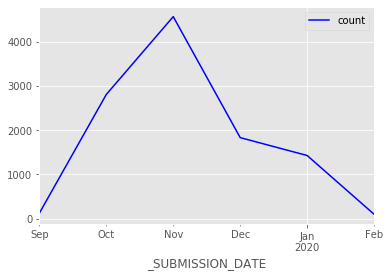

In [49]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

data_df.plot(color="blue")

### Notice the sharp increase from September to November and crazy drop from November to December

In [51]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(data_df)
# fig = result.plot()

In [60]:
complete=pd.read_csv('dataforms.csv')
complete

,Unnamed: 0,_URI,_IS_COMPLETE,_SUBMISSION_DATE,END_TIME,LNG,GPS_ALT,IMAGE_CLASS,COMMENT,GPS_ACC,...,START_TIME,PHONE_ID,IMAGE_LINK,PLANT_TYPE,M,WEEK,DAY,YEAR,MONTH,STATUS
0,0,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,1,2019-09-23 00:37:14.227000,2019-09-23 00:35:30.644000,32.597185,0.000000,other,Testing,2099.999,...,2019-09-23 00:32:32.194000,NaN,http://3.19.236.194:8080/ODKAggregate/view/bin...,Beans,9,39,23,2019,September,Diseased
1,1,uuid:8305c43b-00fb-4419-9f54-28388d176080,1,2019-09-23 00:47:25.139000,2019-09-23 00:46:43.390000,32.597948,1158.655716,other,NaN,4.000,...,2019-09-23 00:44:56.938000,3.550051e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...,Beans,9,39,23,2019,September,Diseased
2,2,uuid:d321337b-2369-4479-a39b-7804b79489d8,1,2019-09-23 13:09:22.858000,2019-09-23 12:23:40.590000,32.625300,1156.700000,other,I don't the disease,4.813,...,2019-09-23 12:21:06.861000,NaN,http://3.19.236.194:8080/ODKAggregate/view/bin...,Beans,9,39,23,2019,September,Diseased
3,3,uuid:aad12a8d-d9a7-4251-8974-8d03dc12d044,1,2019-09-23 13:09:42.293000,2019-09-23 12:57:58.117000,32.625314,1146.000000,als,Commlon bacteria blight,7.300,...,2019-09-23 12:55:59.742000,3.582461e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...,Beans,9,39,23,2019,September,Diseased
4,4,uuid:b350bff5-91e3-47e3-83d0-86e057bc9c74,1,2019-09-23 13:13:06.750000,2019-09-23 12:35:02.914000,32.625322,1127.700000,other,Leaf spot,3.900,...,2019-09-23 12:33:52.393000,3.582461e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...,Beans,9,39,23,2019,September,Diseased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273653,273653,uuid:87d9de62-de01-4470-937d-57035d14e9f3,0,2020-06-30 04:09:24.999000,2020-06-26 09:56:56.269000,33.649752,1118.500000,cmd,NaN,4.940,...,2020-06-26 09:54:05.501000,3.582461e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...,Cassava,6,27,30,2020,June,Diseased
273654,273654,uuid:94ffe6af-0d96-4305-bb08-6a1255777f8e,0,2020-06-30 04:09:25.801000,2020-06-26 09:57:21.417000,33.649744,1118.700000,cmd,NaN,4.150,...,2020-06-26 09:56:58.989000,3.582461e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...,Cassava,6,27,30,2020,June,Diseased
273655,273655,uuid:5b6dac9b-ad53-46d7-989b-9cc21422650c,0,2020-06-30 04:09:26.592000,2020-06-26 09:57:47.556000,33.649717,1118.300000,cmd,NaN,4.240,...,2020-06-26 09:57:23.987000,3.582461e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...,Cassava,6,27,30,2020,June,Diseased
273656,273656,uuid:fd0c81d0-c785-4151-a034-e7ac6885a65c,0,2020-06-30 04:09:27.383000,2020-06-26 09:58:16.406000,33.649718,1118.500000,cmd,NaN,4.100,...,2020-06-26 09:57:50.049000,3.582461e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...,Cassava,6,27,30,2020,June,Diseased


In [61]:
complete.shape

(273658, 21)

In [63]:
extract=complete[['_URI','_SUBMISSION_DATE']]
extract.head(3)

,_URI,_SUBMISSION_DATE
0,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,2019-09-23 00:37:14.227000
1,uuid:8305c43b-00fb-4419-9f54-28388d176080,2019-09-23 00:47:25.139000
2,uuid:d321337b-2369-4479-a39b-7804b79489d8,2019-09-23 13:09:22.858000


In [64]:
extract = extract[extract["_SUBMISSION_DATE"].notnull()]
# Ensure the index is still sequential
extract = extract[["_SUBMISSION_DATE"]].reset_index(drop=True)
# Select the first 10 rows
extract.head(10)

,_SUBMISSION_DATE
0,2019-09-23 00:37:14.227000
1,2019-09-23 00:47:25.139000
2,2019-09-23 13:09:22.858000
3,2019-09-23 13:09:42.293000
4,2019-09-23 13:13:06.750000
5,2019-09-23 13:44:56.092000
6,2019-09-23 13:45:10.648000
7,2019-09-23 14:23:56.327000
8,2019-09-23 14:27:28.132000
9,2019-09-23 17:45:29.297000


In [65]:
extract.tail(3)

,_SUBMISSION_DATE
273655,2020-06-30 04:09:26.592000
273656,2020-06-30 04:09:27.383000
273657,2020-06-30 04:09:28.153000


In [66]:
import datetime

# Convert applieddate to datetime
t = extract.copy()
t["_SUBMISSION_DATE"] = t["_SUBMISSION_DATE"].apply(pd.to_datetime)
t = t.set_index(t["_SUBMISSION_DATE"])

In [67]:
# Group by month
grouped = t.resample("M").count()
data_df = pd.DataFrame({"count": grouped.values.flatten()}, index=grouped.index)
data_df.head(10)

,count
_SUBMISSION_DATE,
2019-09-30,913
2019-10-31,16531
2019-11-30,36481
2019-12-31,34423
2020-01-31,36015
2020-02-29,36362
2020-03-31,33098
2020-04-30,5094
2020-05-31,11046


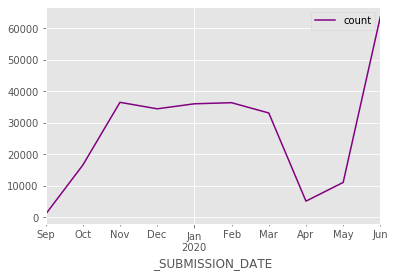

In [68]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

data_df.plot(color="purple")

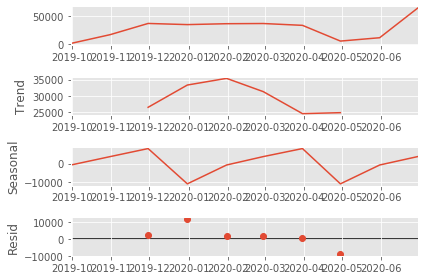

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_df, period=4)
fig = result.plot()

In [81]:
from fbprophet import Prophet
model = Prophet()
train_df = data_df.rename(columns={"count":'y'})
train_df["ds"] = train_df.index
model.fit(train_df)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [85]:
future

,ds
0,2019-09-30
1,2019-10-31
2,2019-11-30
3,2019-12-31
4,2020-01-31
5,2020-02-29
6,2020-03-31
7,2020-04-30
8,2020-05-31
9,2020-06-30


In [89]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-09-30,17378.970042,-4461.955013,37870.352637,17378.970042,17378.970042,0.0,0.0,0.0,0.0,0.0,0.0,17378.970042
1,2019-10-31,19626.244969,-781.698051,39471.982168,19626.244969,19626.244969,0.0,0.0,0.0,0.0,0.0,0.0,19626.244969
2,2019-11-30,21801.027088,-814.662354,43125.999467,21801.027088,21801.027088,0.0,0.0,0.0,0.0,0.0,0.0,21801.027088
3,2019-12-31,24048.301999,2711.941500,45096.998973,24048.301999,24048.301999,0.0,0.0,0.0,0.0,0.0,0.0,24048.301999
4,2020-01-31,26295.576907,5226.545998,44547.924440,26295.576907,26295.576907,0.0,0.0,0.0,0.0,0.0,0.0,26295.576907
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2021-01-12,51450.555963,30818.774565,71030.891146,51450.554419,51450.557536,0.0,0.0,0.0,0.0,0.0,0.0,51450.555963
206,2021-01-13,51523.048698,30127.426096,73269.281394,51523.047142,51523.050287,0.0,0.0,0.0,0.0,0.0,0.0,51523.048698
207,2021-01-14,51595.541432,30485.765849,72917.650614,51595.539867,51595.543030,0.0,0.0,0.0,0.0,0.0,0.0,51595.541432
208,2021-01-15,51668.034166,30316.822378,71904.974783,51668.032590,51668.035772,0.0,0.0,0.0,0.0,0.0,0.0,51668.034166


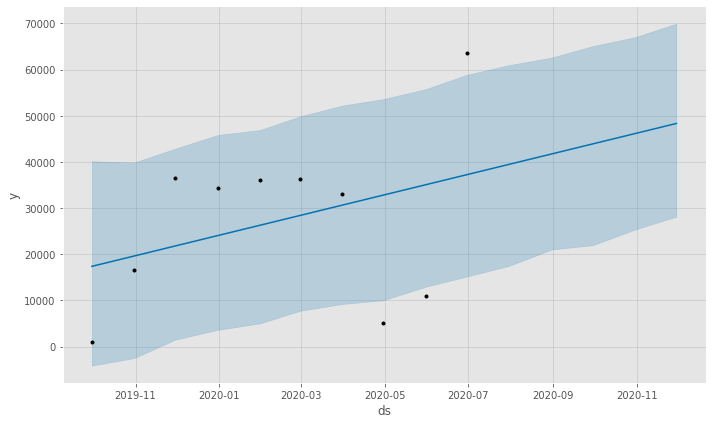

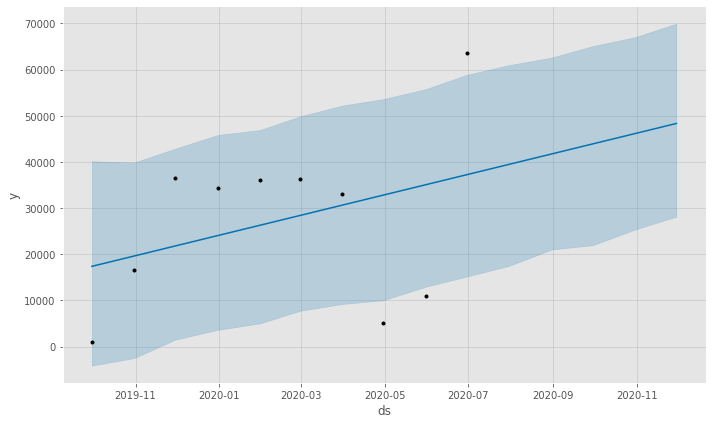

In [91]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 5 months
future = model.make_future_dataframe(5, freq='M', include_history=True)
forecast = model.predict(future)
model.plot(forecast)